<a href="https://colab.research.google.com/github/OnkarMulay10/EEG_Epilepsy/blob/main/EEG_epilepsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer

In [2]:
d=pd.read_csv('data.csv')
print(d.shape)

(11500, 180)


In [3]:
d.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,66,81,98,111,122,105,85,66,51,34,19,16,8,-5,-21,-18,-14,3,27,46,57,60,51,35,22,20,28,28,35,43,...,-4,-17,-30,-45,-71,-81,-78,-69,-60,-45,-33,-25,-14,-2,3,-5,-18,-39,-61,-73,-77,-76,-79,-64,-40,-25,0,9,12,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,0,-38,-77,-113,-128,-121,-105,-71,-27,13,44,60,64,40,30,25,28,34,31,18,-19,-53,-76,-81,-74,-57,-36,-21,12,55,...,94,109,107,88,52,5,-24,-37,-50,-58,-66,-65,-60,-45,-20,1,23,50,74,99,125,141,129,95,41,-21,-77,-117,-135,-137,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,-19,-18,-16,-15,-14,-21,-19,-24,-24,-24,-17,-20,-23,-15,-17,-20,-18,-19,-20,-19,-18,-20,-25,-27,-24,-22,-20,-9,0,...,-20,-26,-24,-25,-35,-41,-41,-53,-61,-58,-59,-55,-53,-65,-78,-87,-97,-100,-106,-104,-107,-110,-110,-109,-104,-118,-111,-102,-80,-67,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,-63,-39,-11,14,36,60,70,78,79,69,27,-45,-123,-183,-218,-242,-256,-256,-236,-205,-165,-125,-84,-41,-10,12,35,58,71,...,74,79,81,76,65,63,62,65,67,70,63,45,20,-11,-32,-26,3,40,85,124,182,248,349,418,419,291,73,-152,-311,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,41,48,44,34,16,-2,-11,-24,11,33,43,48,42,33,14,-1,-7,-17,-36,-59,-74,-88,-84,-64,-37,-8,24,47,49,42,...,39,29,12,-8,-10,-13,-12,-7,1,3,6,13,12,7,0,2,2,15,28,27,18,2,-5,-6,13,41,66,72,68,65,49,31,11,-5,-17,-19,-15,-15,-11,4


##Data Transformation and Normalization


##Balanced Dataset

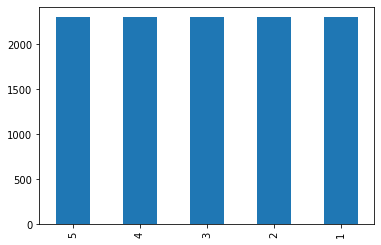

In [4]:
d['y'].value_counts().plot(kind='bar');

In [5]:
d.rename(columns={ d.columns[0]: "Index" }, inplace = True)
#d = d.set_index(d['Index'])
#d.drop('Index',axis='columns',inplace=True)

##Saumya Dataset


In [6]:
ds=d

##Features

In [7]:
y=d.y
d.drop(columns='y')
d.iloc[:,1:] = Normalizer(norm='l1').fit_transform(d.iloc[:,1:])
d['y']=y

In [8]:
d['y']=d['y'].astype(int)
d_e=d[d["y"]==1]
d_ne=d[d["y"]!=1]

In [9]:
d_e.shape

(2300, 180)

(array([[ 0.,  0., 16., ...,  0.,  0.,  0.],
        [ 0.,  0.,  8., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  0.,  9., ...,  0.,  0.,  0.],
        [ 0.,  0.,  7., ...,  0.,  0.,  0.]]),
 array([-0.04978339, -0.03779219, -0.02580099, -0.01380979, -0.00181859,
         0.01017261,  0.02216381,  0.03415501,  0.04614621,  0.05813741,
         0.07012861]),
 <a list of 2300 Lists of Patches objects>)

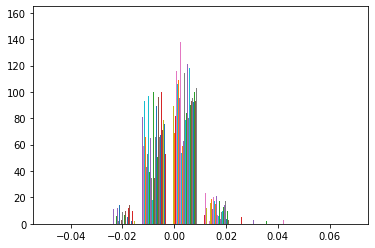

In [10]:
matrix=d_e.iloc[:,1:179]
plt.hist(matrix)

(array([[0., 0., 3., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.05184219, -0.04054031, -0.02923842, -0.01793654, -0.00663466,
         0.00466723,  0.01596911,  0.027271  ,  0.03857288,  0.04987476,
         0.06117665]),
 <a list of 9200 Lists of Patches objects>)

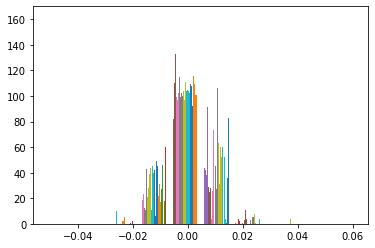

In [11]:
matrix2=d_ne.iloc[:,1:179]
plt.hist(matrix2)

In [12]:
d.drop('y',axis='columns',inplace=True)

In [13]:
df=pd.DataFrame()
df['skew']=d.skew(axis = 1, skipna = True) 
df['mean']=d.mean(axis = 1, skipna = True)
df['kurtosis']=d.kurtosis(axis = 1, skipna = True) 
df['variance']=d.var(axis = 1, skipna = True) 
df['min']=d.min(axis = 1, skipna = True) 
df['max']=d.max(axis = 1, skipna = True) 
#df['range']=d.range(axis = 1, skipna = True) 
df['mad']=d.iloc[:,1:179].mad(axis=1)
df['y']=y
d1=pd.DataFrame()
d1=d.T

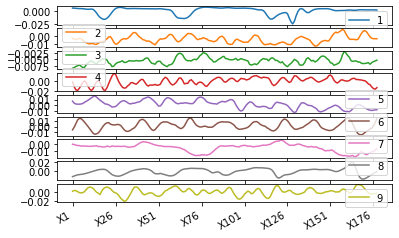

In [14]:
d1.iloc[1:11500,1:10].plot(subplots=True)
plt.show()

In [15]:
#for key,eeg in d.iteritems:
 # a=eeg.plt.plot()
  #fig.savefig(key)

In [16]:
import os
figs1='figs1'
figs_REst='figs_rest'
os.mkdir(figs1)
os.mkdir(figs_REst)

##Freq Data

In [17]:
from scipy import fftpack
SR=178
N=(1-0)*SR
frequency = np.linspace (0.0, 89, int (N/2))
freq_d =fftpack.fft(d1.iloc[1:11500,:].values)
y_axis = 2/N * np.abs (freq_d [0:np.int (N/2)])

In [18]:
freq_d=pd.DataFrame(freq_d)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/

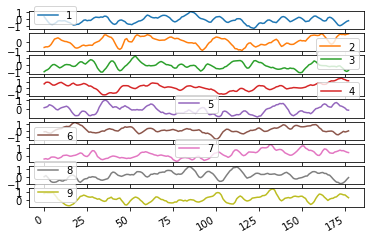

In [19]:
freq_d.iloc[:,1:10].plot(subplots=True)
plt.show()

###Peaks

In [20]:
'''
from scipy.signal import find_peaks
for key,eeg in enumerate(d.columns):
  peaks,_=find_peaks(d.iloc[1:11500,i])
  plt.plot(d1.iloc[1:11500,:].values)
  plt.plot(peaks, d.iloc[1:11500,:].values[peaks], "x")
'''

'\nfrom scipy.signal import find_peaks\nfor key,eeg in enumerate(d.columns):\n  peaks,_=find_peaks(d.iloc[1:11500,i])\n  plt.plot(d1.iloc[1:11500,:].values)\n  plt.plot(peaks, d.iloc[1:11500,:].values[peaks], "x")\n'

In [21]:
print(freq_d.applymap(np.absolute))

         0         1         2      ...     11497     11498     11499
0     9.196737  0.362914  0.697211  ...  0.908056  0.697211  0.362914
1     8.908106  0.168374  0.592698  ...  0.762074  0.592698  0.168374
2     8.904633  0.392694  0.568359  ...  0.708501  0.568359  0.392694
3     8.878725  0.709329  0.509032  ...  0.481690  0.509032  0.709329
4     8.896218  0.944660  0.386425  ...  0.157809  0.386425  0.944660
..         ...       ...       ...  ...       ...       ...       ...
173  11.042720  0.926124  0.801300  ...  0.485471  0.801300  0.926124
174  10.660164  0.704781  0.823941  ...  0.548458  0.823941  0.704781
175  10.284738  0.529351  0.770782  ...  0.773425  0.770782  0.529351
176  10.006591  0.498444  0.838227  ...  0.860780  0.838227  0.498444
177   9.778222  0.616082  0.922950  ...  0.739407  0.922950  0.616082

[178 rows x 11500 columns]


In [47]:
d_train=pd.DataFrame
d_train=d
d_train['skew']= df['skew']
d_train['mean']= df['mean']
d_train['kurtosis']= df['kurtosis']
d_train['variance']= df['variance']
d_train['min']= df['min']
d_train['max']= df['max']
d_train['mad']= df['mad']
d.shape

(11500, 186)

In [86]:
X = d_train.iloc[0:11500,1:187].values


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

'''
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

'''

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors =2 , metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

'''
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
'''
'''
classifier = XGBClassifier(booster='gbtree',n_estimators=100) 
classifier.fit(X_train, y_train)
'''
# Predicting the Test set results
y_pred = classifier.predict(X_test)



In [87]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.24%


In [80]:
import numpy as np
from collections import Counter
import pandas as pd
import lightgbm as lgb
from sklearn.datasets import load_breast_cancer,load_boston,load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,roc_auc_score,precision_score
#train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
#converting the dataset into proper LGB format 
d_train1=lgb.Dataset(X_train, label=y_train)
#Specifying the parameter
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='binary' #Binary target feature
params['metric']='binary_logloss' #metric for binary classification
params['max_depth']=10
#train the model 
clf=lgb.train(params,d_train1,100) #train the model on 100 epocs
#prediction on the test set
y_pred=clf.predict(X_test)

In [81]:
print(y_pred)

[1. 1. 1. ... 1. 1. 1.]
